# Setup

### Non-Jupyter notebook Copy-paste version

In [35]:
print(Out[27])

KeyError: 27

In [ ]:
case_number ="Case3-9"
project_dir = "/standard/vol328/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/"
#project_dir="/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate"
import anndata as ad
import scimap as sm
import importlib
import os
import glob

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
'''
from PyQt6.QtWidgets import QLabel
from PyQt6.QtCore import Qt

func = sm.pl.napariGater
func.__globals__['QLabel'] = QLabel
func.__globals__['Qt'] = Qt
'''

adata = ad.read_h5ad(os.path.join(project_dir, 'raw_adata', f'{case_number}_raw.h5ad'))
adata.obs['imageid']
 
image_search_pattern = os.path.join(project_dir, case_number, f'*{case_number}*fullpanel*final.tif')
image_files = glob.glob(image_search_pattern, recursive=True)

if image_files:
    image_path = image_files[0]
    print(f"image_path for {case_number}: {image_path}")
else:
    image_path = None
    print(f"No image found for {case_number}")

sm.pl.napariGater (image_path, adata) #channel_names=['CD163','alphaSMA','CD8','CD19','CD31','PDGFRBeta','pSTAT1','FOXP3','CD68','BRAFV600E','phospho-p38','anti-Melanoma','phospho-p44','FAP'])

gates_df2 = adata.uns['gates']
print(gates_df2)

KeyboardInterrupt: 

if you need to concatenate new gates to old gates

In [ ]:
gates_df2 = adata.uns['gates']
gates_df1 = pd.read_csv(os.path.join(project_dir,'gates', f"{case_number}_gates.csv"), index_col=0)


gates_df2.columns = gates_df2.columns.astype(str)


gates_df2 = gates_df2.rename(columns={gates_df2.columns[0]: case_number})
rows_to_add = gates_df2.iloc[18:]

gates_df_new = pd.concat([gates_df1, rows_to_add], axis=0)
gates_df_new.index.name = 'markers'
gates_df_new.to_csv(os.path.join(project_dir,'gates', f"{case_number}_full_gates.csv"), index=True)
gates_df_new.to_csv(os.path.join(project_dir,case_number, f"{case_number}_full_gates.csv"), index=True)

In [ ]:
gates_df = adata.uns['gates']
#gates_path=os.path.join(project_dir,case_number, f"{case_number}_gates.csv")
gates_df_new.to_csv(os.path.join(project_dir,'gates', f"{case_number}_gates.csv"), index=True)
gates_df.to_csv((gates_path), index=True)
print(f"Saved gates to {gates_path}")

### Load packages

In [57]:

import os
import glob

#project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/"
#project_dir = "/standard/vol328/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/"
#project_dir ="/Users/zqn7td/Desktop/9samples_cellstate/"

os.chdir("/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts")

In [58]:
##Import packages


import anndata as ad
import scimap as sm
import importlib

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

In [386]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Set up files, directories, variables

Set and go to project directory 

## Set Case number here

In [56]:
case_numbers = [
    "Case1-31",
    "Case2-8",
    "Case3-9",
    "Case4-5_R1",
    "Case4-5_R2",
    "Case7-10",
    "Case8-9_R1",
    "Case8-9_R2",
    "Case9-7_R2",
    "Case10-3_R1",
    "Case10-3_R2",
    "Case11-13"
]
#"Case3-9",

#phenotype = pd.read_csv(os.path.join(project_dir, '20250716_phenotyping_workflow_allcombinations.csv'))

In [93]:


case_numbers = [
   
    "Case2-8",
    "Case3-9",
    
    "Case7-10",
   
]

In [59]:
feature_dir = os.path.join(project_dir, 'feature-extraction')
all_feature_files = glob.glob(os.path.join(feature_dir, '*feature-extraction_merged.csv'))

feature_table_paths = {}

for case_number in case_numbers:
    # Find all files that contain the case_number in their name
    matches = [f for f in all_feature_files if case_number in os.path.basename(f)]
    if matches:
        # Take up to 3 matches per case_number
        feature_table_paths[case_number] = matches[0]
        print(f"Found feature extraction files for {case_number}: {matches[0]}")
    else:
        feature_table_paths[case_number] = []
        print(f"No feature extraction file found for {case_number}")

Found feature extraction files for Case1-31: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case1-31_feature-extraction_merged.csv
Found feature extraction files for Case2-8: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case2-8_feature-extraction_merged.csv
Found feature extraction files for Case3-9: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case3-9_feature-extraction_merged.csv
Found feature extraction files for Case4-5_R1: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case4-5_R1_feature-extraction_merged.csv
Found feature extraction files for Case4-5_R2: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case4-5_R2_feature-extraction_me

In [60]:
feature_table_paths

{'Case1-31': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case1-31_feature-extraction_merged.csv',
 'Case2-8': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case2-8_feature-extraction_merged.csv',
 'Case3-9': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case3-9_feature-extraction_merged.csv',
 'Case4-5_R1': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case4-5_R1_feature-extraction_merged.csv',
 'Case4-5_R2': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case4-5_R2_feature-extraction_merged.csv',
 'Case7-10': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/feature-extraction/Case7

In [61]:
# Loop through each case and its feature extraction file
for case_number, feature_table_path in feature_table_paths.items():
    if feature_table_path is not None:
        print(f"Processing {case_number}...")
        adata = sm.pp.mcmicro_to_scimap(feature_table_path)
        #make log1p raw layer
        adata.layers["log1p_raw"] = np.log1p(adata.raw.X)
        #clean imageid
        adata.obs['imageid'] = (
            adata.obs['imageid']
            .astype(str)  # ensure string (especially if it's Categorical)
            .str.replace('_feature_extraction$', '', regex=True)
        )

       
        # Save with case number as prefix
        save_path = os.path.join(project_dir, 'raw_adata', f"{case_number}_raw.h5ad")
        adata.write_h5ad(save_path)
        print(f"Saved: {save_path}")
    else:
        print(f"Skipping {case_number}: No feature extraction file found.")

Processing Case1-31...
Loading Case1-31_feature-extraction_merged.csv
Saved: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/raw_adata/Case1-31_raw.h5ad
Processing Case2-8...
Loading Case2-8_feature-extraction_merged.csv
Saved: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/raw_adata/Case2-8_raw.h5ad
Processing Case3-9...
Loading Case3-9_feature-extraction_merged.csv
Saved: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/raw_adata/Case3-9_raw.h5ad
Processing Case4-5_R1...
Loading Case4-5_R1_feature-extraction_merged.csv
Saved: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/raw_adata/Case4-5_R1_raw.h5ad
Processing Case4-5_R2...
Loading Case4-5_R2_feature-extraction_merged.csv
Saved: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/raw_adata

In [317]:
adata_list[0].obs['imageid']

Case8-9_R2_feature_extraction_1         Case8-9_R2
Case8-9_R2_feature_extraction_2         Case8-9_R2
Case8-9_R2_feature_extraction_3         Case8-9_R2
Case8-9_R2_feature_extraction_4         Case8-9_R2
Case8-9_R2_feature_extraction_5         Case8-9_R2
                                           ...    
Case8-9_R2_feature_extraction_145401    Case8-9_R2
Case8-9_R2_feature_extraction_145402    Case8-9_R2
Case8-9_R2_feature_extraction_145403    Case8-9_R2
Case8-9_R2_feature_extraction_145404    Case8-9_R2
Case8-9_R2_feature_extraction_145405    Case8-9_R2
Name: imageid, Length: 145405, dtype: category
Categories (1, object): ['Case8-9_R2']

## Gating for individual images 

### Set case_number here

In [89]:
case_number ="Case9-7_R2"

In [90]:
adata = ad.read_h5ad(os.path.join(project_dir, 'raw_adata', f'{case_number}_raw.h5ad'))
adata.obs['imageid']

Case9-7_R2_feature_extraction_1         Case9-7
Case9-7_R2_feature_extraction_2         Case9-7
Case9-7_R2_feature_extraction_3         Case9-7
Case9-7_R2_feature_extraction_4         Case9-7
Case9-7_R2_feature_extraction_5         Case9-7
                                         ...   
Case9-7_R2_feature_extraction_160571    Case9-7
Case9-7_R2_feature_extraction_160572    Case9-7
Case9-7_R2_feature_extraction_160573    Case9-7
Case9-7_R2_feature_extraction_160574    Case9-7
Case9-7_R2_feature_extraction_160575    Case9-7
Name: imageid, Length: 160575, dtype: category
Categories (1, object): ['Case9-7']

## Check pixel distribution 

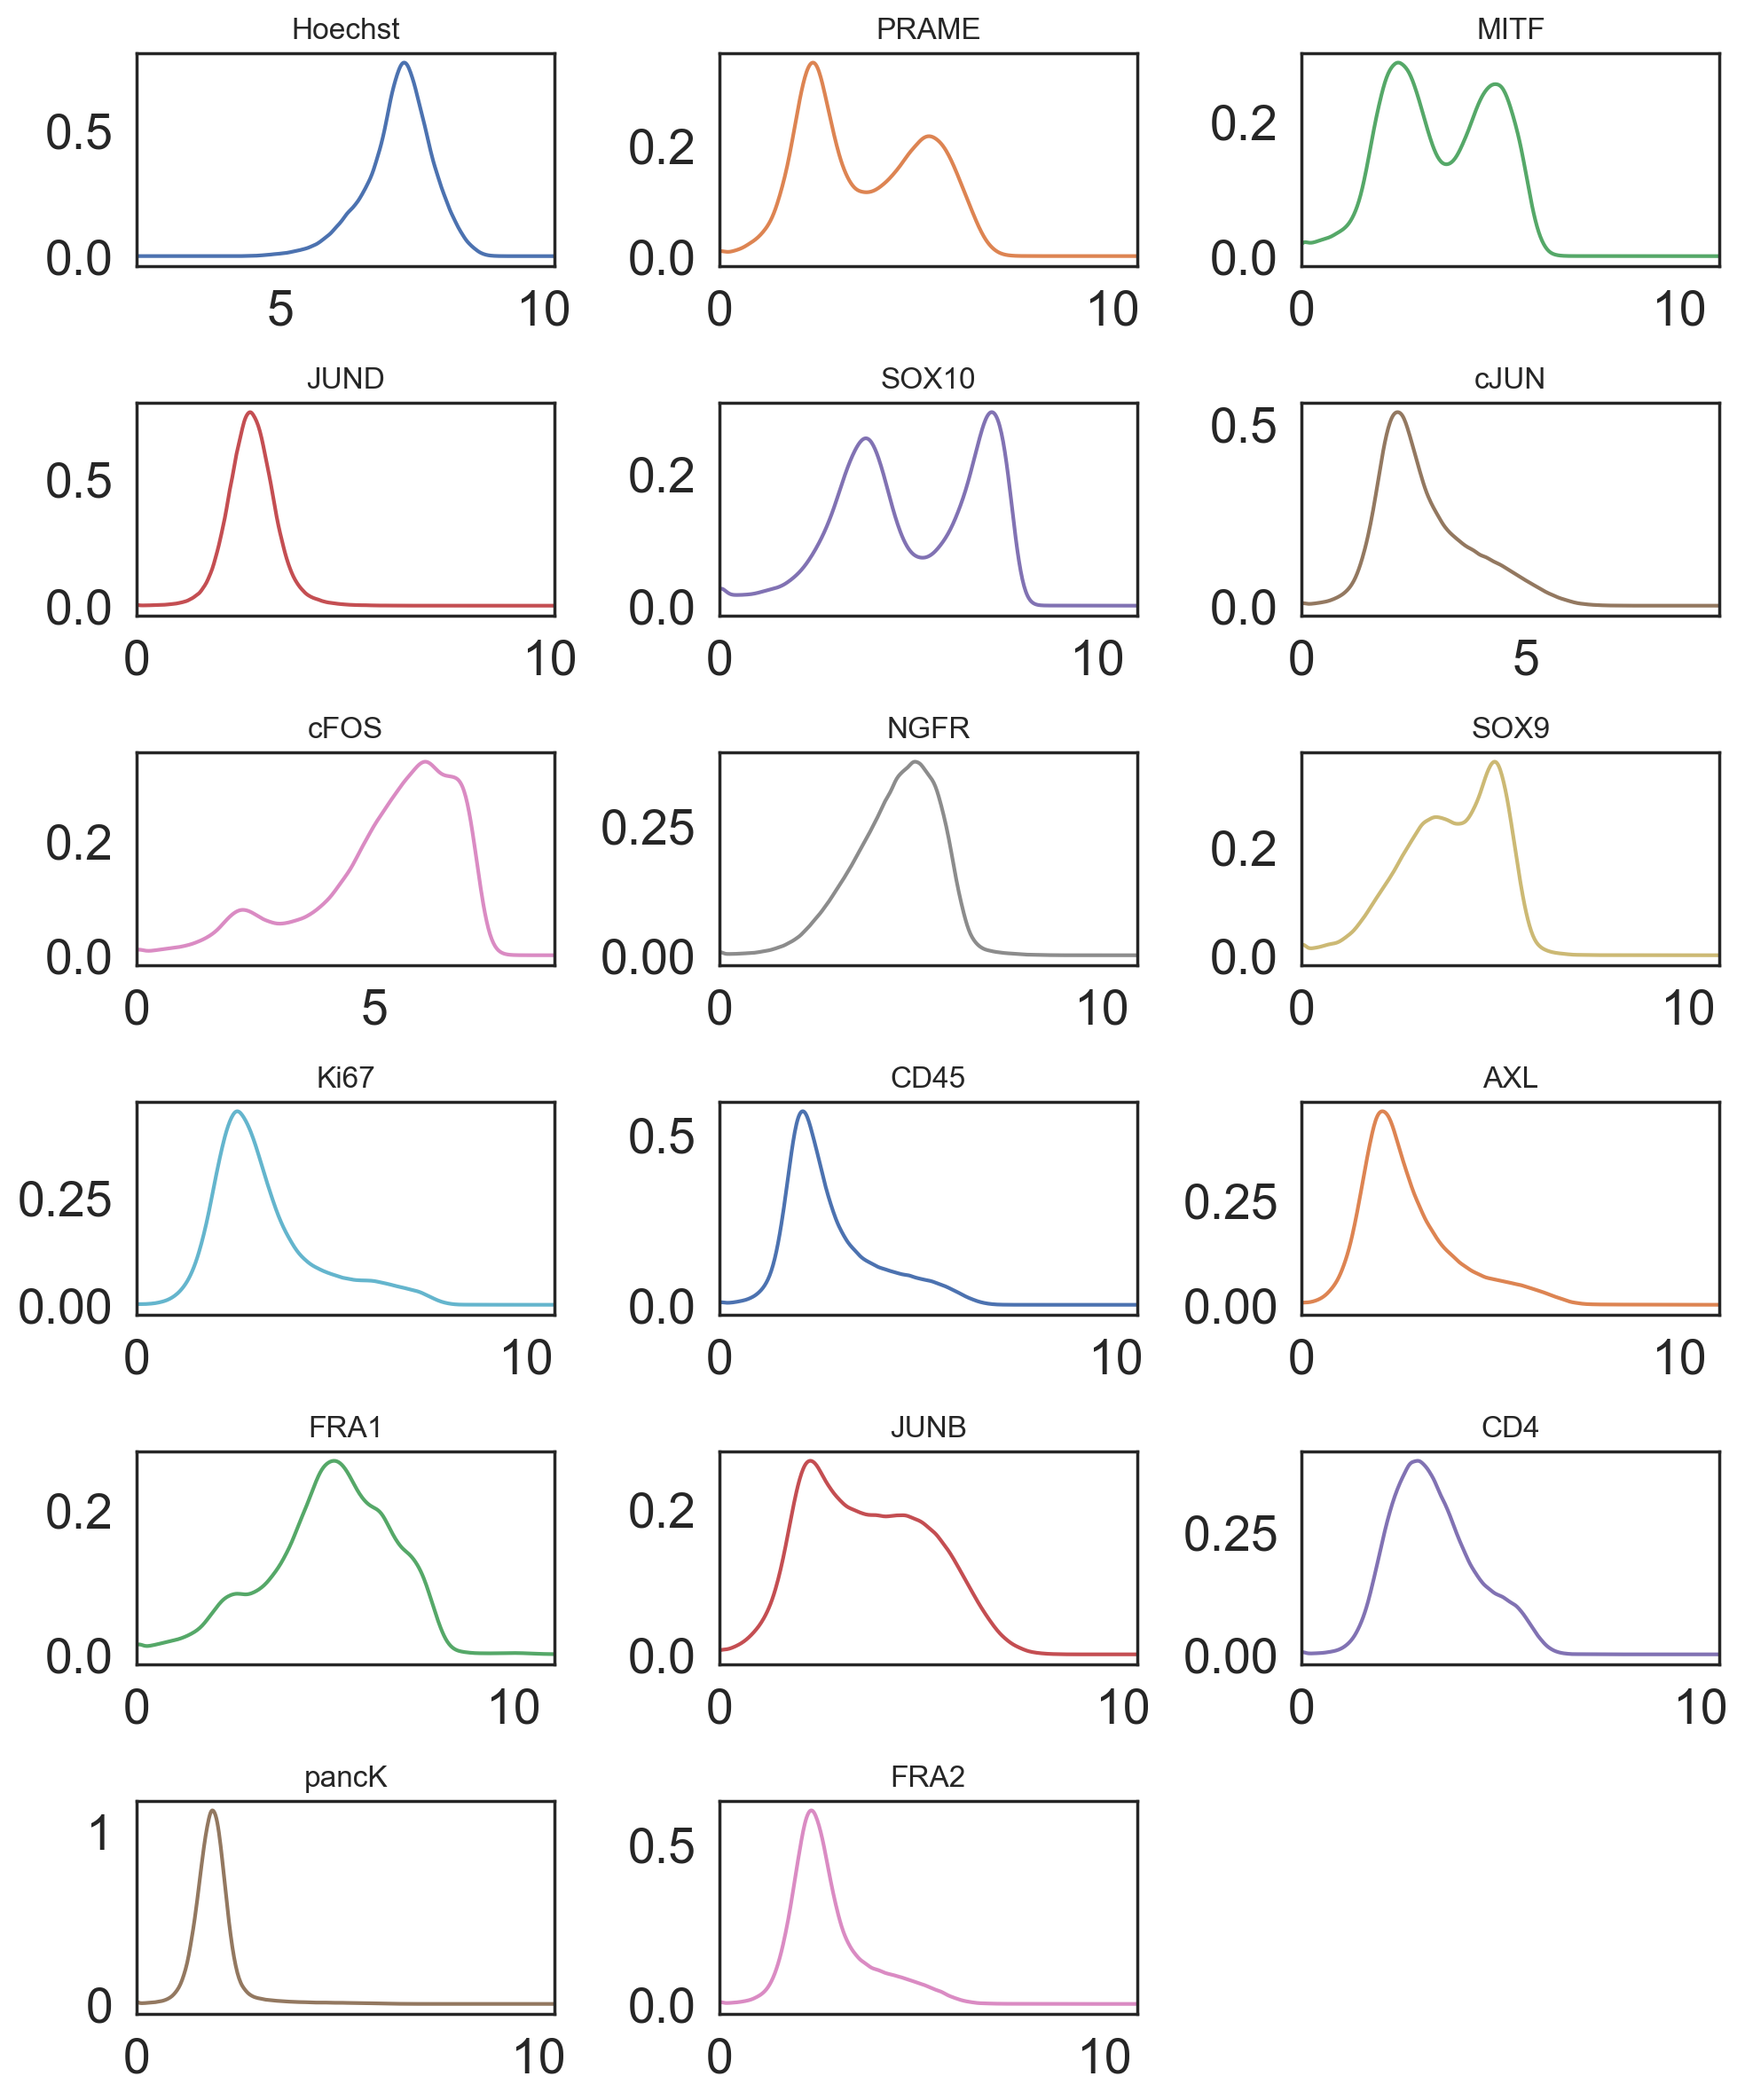

In [69]:
hm.distPlot(adata, layer='log1p_raw',figsize=(10,12),ncols=3, fontsize=20)

## Gating

Find image file. Use final rolling ball background subtracted version

In [91]:
# Search recursively for the ome.tif file containing the case_number in its name  
image_search_pattern = os.path.join(project_dir, case_number, f'*{case_number}*rb*final.ome.tif')
image_files = glob.glob(image_search_pattern, recursive=True)

if image_files:
    image_path = image_files[0]
    print(f"image_path for {case_number}: {image_path}")
else:
    image_path = None
    print(f"No image found for {case_number}")

image_path for Case9-7_R2: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case9-7_R2/Case9-7_R2_bgsub_rb_15_final.ome.tif


read in image file

In [23]:
from tifffile import imread
img_data = imread(image_path)
print(img_data.shape) 

(17, 3000, 9325)


In [71]:
image_path

'/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case8-9_R1/Case8-9_R1_bgsub_rb_15_final.ome.tif'

Use napari to identify gates for thresholding positive vs negative expression of markers. Gates are used for binarized phenotyping and also for normalization of markers that are expressed on a continuos distribution

In [ ]:
sm.pl.napariGater (image_path, adata, )

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_27495/2199281803.py:1: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Initializing...
Initializing gates with GMM...


Loading image data...
Calculating contrast settings...


Saved contrast settings for Case9-7 with 17 channels
Initialization completed in 8.52 seconds
Opening napari viewer...
Napari viewer initialized in 10.53 seconds


In [78]:
adata.uns['gates']

Case8-9
Hoechst  7.414495
PRAME    4.400000
MITF     4.000000
JUND     3.600000
SOX10    6.000000
cJUN     3.250000
cFOS     4.360000
NGFR     5.110000
SOX9     4.300000
Ki67     4.200000
CD45     4.000000
AXL      4.420000
FRA1     6.042569
JUNB     4.649043
CD4      4.340000
pancK    4.100000
FRA2     4.000000

Save gates to csv

In [88]:
gates_df = adata.uns['gates']
gates_path=os.path.join(project_dir,case_number, f"{case_number}_gates.csv")
gates_df.to_csv((gates_path), index=True)
print(f"Saved gates to {gates_path}")

Saved gates to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case10-3_R1/Case10-3_R1_gates.csv


## Generate list containing normalized adata of all cases

find paths to gates.csv files 

In [299]:

gate_file_paths = {}

for case_number in case_numbers:
    # Search for gates.csv inside the case-specific subdirectory
    search_path = os.path.join(project_dir, case_number, '*gates.csv')
    matches = glob.glob(search_path)
    if matches:
        gate_file_paths[case_number] = matches[0]  # Take the first match
        print(f"Found for {case_number}: {matches[0]}")
    else:
        gate_file_paths[case_number] = None
        print(f"No gates.csv file found for {case_number}")

Found for Case1-31: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case1-31/Case1-31_gates.csv
Found for Case2-8: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case2-8/Case2-8_gates.csv
Found for Case4-5_R1: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case4-5_R1/Case4-5_R1_gates.csv
Found for Case4-5_R2: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case4-5_R2/Case4-5_R2_gates.csv
Found for Case7-10: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case7-10/Case7-10_gates.csv
Found for Case8-9_R1: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case8-9_R1/Case8-9_R1_gates.csv
Found for Case8-9_R2: /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples

In [300]:
gate_file_paths

{'Case1-31': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case1-31/Case1-31_gates.csv',
 'Case2-8': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case2-8/Case2-8_gates.csv',
 'Case4-5_R1': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case4-5_R1/Case4-5_R1_gates.csv',
 'Case4-5_R2': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case4-5_R2/Case4-5_R2_gates.csv',
 'Case7-10': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case7-10/Case7-10_gates.csv',
 'Case8-9_R1': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case8-9_R1/Case8-9_R1_gates.csv',
 'Case8-9_R2': '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case8-9_R2/Case8-9_

Loop through adata for each case, normalize the adata to that case's gate values, and append normalized data to a list

In [353]:
adata_list = []

for case_number in case_numbers:
    if gate_file_paths[case_number] is not None:
        print(f"Reading in raw adata for {case_number}")
        # Read in raw adata file for this case
        adata_path = os.path.join(project_dir, 'raw_adata', f'{case_number}_raw.h5ad')
        adata = ad.read_h5ad(adata_path)
        
        print(f"Copying gates from {gate_file_paths[case_number]}")
        marker_gates = pd.read_csv(os.path.join( project_dir, case_number, f'{case_number}_gates.csv'),
        header = [0], index_col =[0])
        adata.uns['gates'] = marker_gates
        
        hm.normalize_to_gates(adata)
        # Copy the original layer
        adata.layers['log_background_normalized_zeroed'] = adata.layers['log_background_normalized'].copy()
        # Zero out negative values
        adata.layers['log_background_normalized_zeroed'][adata.layers['log_background_normalized_zeroed'] < 0] = 0
        
        adata.obs['TissueID']= adata.obs['imageid'].str.split('_').str[0]
        
        adata_list.append(adata)
    else:
        print(f"Skipping {case_number}: No gates.csv file found, cannot normalize and combine")
        


Reading in raw adata for Case1-31
Copying gates from /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case1-31/Case1-31_gates.csv
Subtracting the following gate values from each marker:
  Hoechst: 5.0
  PRAME: 2.86
  MITF: 4.3
  JUND: 3.7
  SOX10: 4.6
  cJUN: 2.9
  cFOS: 3.9
  NGFR: 6.5
  SOX9: 4.2
  Ki67: 2.85
  CD45: 3.6
  AXL: 3.6
  FRA1: 4.9
  CD4: 3.9
  JUNB: 2.9
  pancK: 2.7
  FRA2: 3.0
Background normalization complete. Layer 'log_background_normalized' added.
Reading in raw adata for Case2-8
Copying gates from /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/Case2-8/Case2-8_gates.csv
Subtracting the following gate values from each marker:
  Hoechst: 8.0065501831352
  PRAME: 4.069999999999999
  MITF: 3.82
  JUND: 3.95
  SOX10: 5.52
  cJUN: 4.06
  cFOS: 4.29
  NGFR: 5.42
  SOX9: 4.109999999999998
  Ki67: 4.58
  CD45: 3.91
  AXL: 5.54
  FRA1: 4.48
  JUNB: 4.02
  CD4: 4.47
  pancK: 3.7

In [354]:
adata_list

[AnnData object with n_obs × n_vars = 33720 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID'
     uns: 'all_markers', 'gates'
     layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed',
 AnnData object with n_obs × n_vars = 674801 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID'
     uns: 'all_markers', 'gates'
     layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed',
 AnnData object with n_obs × n_vars = 61028 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID'
     uns: 'all_markers', 'gates'
     layers: 'log', 'log1p_raw', 'log_background_n

## add ROIs


loop through each adata in adata_list and add ROIs using napari

In [ ]:
for adata in adata_list:
    case_number= adata.obs['imageid'].unique()[0]
    print(f"Adding ROI image for {case_number}")
    image_search_pattern = os.path.join(project_dir, case_number, f'*{case_number}*rb*final.ome.tif')
    image_files = glob.glob(image_search_pattern, recursive=True)
    
    if image_files:
        image_path = image_files[0]
        print(f"image_path for {case_number}: {image_path}")
    else:
        image_path = None
        print(f"No image found for {case_number}")
        
    sm.pl.addROI_image(image_path, adata, markers=['Hoechst','MITF','SOX10','PRAME','NGFR','SOX9','cFOS','cJUN','CD45'])
    print(adata.obs['ROI'].value_counts(dropna=False))
    ROIs = adata.obs['ROI']
    print(f"Saving ROIs for {case_number}")
    ROIs.to_csv(os.path.join(project_dir, case_number,f'{case_number}_ROIs.csv'), index=True)
        
        

if you need to, load in ROI labels from csv

In [355]:
for adata in adata_list:
    case_number=str(adata.obs['imageid'].unique()[0])
    ROIs= pd.read_csv(os.path.join(project_dir, case_number,f'{case_number}_ROIs.csv'), index_col=0)
    adata.obs['ROI'] = ROIs

Read in adata_list if necessary

In [244]:
adata_list= []
for case in case_numbers:
    adata_path = os.path.join(project_dir, 'processed_adata', f'{case}_adata.h5ad')
    adata = ad.read_h5ad(adata_path)
    
    adata_list.append(adata)

extracting gates from adata_list

In [8]:
adata_list= []
for case in case_numbers:
    adata_path = os.path.join(project_dir, 'processed_adata', f'{case}_adata.h5ad')
    adata = ad.read_h5ad(adata_path)
    
    adata_list.append(adata)

In [10]:
adata_list[1].uns['gates']

Case2-8
markers         
AXL      5.54000
CD4      4.47000
CD45     3.91000
FRA1     4.48000
FRA2     4.47000
Hoechst  8.00655
JUNB     4.02000
JUND     3.95000
Ki67     4.58000
MITF     3.82000
NGFR     5.42000
PRAME    4.07000
SOX10    5.52000
SOX9     4.11000
cFOS     4.29000
cJUN     4.06000
pancK    3.70000

In [11]:
# ...existing code...

for adata, case in zip(adata_list, case_numbers):
    gates_df = adata.uns.get('gates')
    if gates_df is not None:
        gates_dir = os.path.join(project_dir,'gates')
        os.makedirs(gates_dir, exist_ok=True)
        gates_path = os.path.join(gates_dir, f'{case}_gates.csv')
        gates_df.to_csv(gates_path, index=True)
        print(f"Saved gates for {case} to {gates_path}")
    else:
        print(f"No gates found for {case}")

#

Saved gates for Case1-31 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case1-31_gates.csv
Saved gates for Case2-8 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case2-8_gates.csv
Saved gates for Case4-5_R1 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case4-5_R1_gates.csv
Saved gates for Case4-5_R2 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case4-5_R2_gates.csv
Saved gates for Case7-10 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case7-10_gates.csv
Saved gates for Case8-9_R1 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/gates/Case8-9_R1_gates.csv
Saved gates for Case8-9_R2 to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_

## Phenotyping

Loop through adata list, rescale data according to gates, and run phenotyping. Data is shifted so the gate is the new 0; positive values will be phenotyped as positive and negative values will be phenotyped as negative. If it's running into an error where it can't find gates, check adata.uns['gates']. Column name for the gates should match imageid

In [356]:
for i in range(len(adata_list)):
    adata = adata_list[i]

    # Validate gate format if necessary (optional safety check)
    gate = adata.uns.get("gates")
    if gate is not None and gate.columns[0] != "gates":
        gate = gate.rename(columns={gate.columns[0]: "gates"}).reset_index().rename(columns={"index": "markers"})
        adata.uns["gates"] = gate

    sm.pp.rescale(adata, gate=adata.uns['gates'])

    adata = sm.tl.phenotype_cells(adata, phenotype=phenotype, label="phenotype")

    adata_list[i] = adata  # store back if needed

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case1-31
Scaling Hoechst (gate: 5.000)
Scaling PRAME (gate: 2.860)
Scaling MITF (gate: 4.300)
Scaling JUND (gate: 3.700)
Scaling SOX10 (gate: 4.600)
Scaling cJUN (gate: 2.900)
Scaling cFOS (gate: 3.900)
Scaling NGFR (gate: 6.500)
Scaling SOX9 (gate: 4.200)
Scaling Ki67 (gate: 2.850)
Scaling CD45 (gate: 3.600)
Scaling AXL (gate: 3.600)
Scaling FRA1 (gate: 4.900)
Scaling CD4 (gate: 3.900)
Scaling JUNB (gate: 2.900)
Scaling pancK (gate: 2.700)
Scaling FRA2 (gate: 3.000)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case2-8
Scaling Hoechst (gate: 8.007)
Scaling PRAME (gate: 4.070)
Scaling MITF (gate: 3.820)
Scaling JUND (gate: 3.950)
Scaling SOX10 (gate: 5.520)
Scaling cJUN (gate: 4.060)
Scaling cFOS (gate: 4.290)
Scaling NGFR (gate: 5.420)
Scaling SOX9 (gate: 4.110)
Scaling Ki67 (gate: 4.580)
Scaling CD45 (gate: 3.910)
Scaling AXL (gate: 5.540)
Scaling FRA1 (gate: 4.480)
Scaling JUNB (gate: 4.020)
Scaling CD4 (gate: 4.470)
Scaling pancK (gate: 3.700)
Scaling FRA2 (gate: 4.470)
Phenotyping Tumor cell
Phenotyping Immune Cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case4-5_R1
Scaling Hoechst (gate: 6.742)
Scaling PRAME (gate: 3.550)
Scaling MITF (gate: 3.500)
Scaling JUND (gate: 3.300)
Scaling SOX10 (gate: 5.600)
Scaling cJUN (gate: 3.100)
Scaling cFOS (gate: 5.000)
Scaling NGFR (gate: 6.700)
Scaling SOX9 (gate: 4.210)
Scaling Ki67 (gate: 3.100)
Scaling CD45 (gate: 3.400)
Scaling AXL (gate: 3.510)
Scaling FRA1 (gate: 5.500)
Scaling CD4 (gate: 4.540)
Scaling JUNB (gate: 3.400)
Scaling pancK (gate: 2.900)
Scaling FRA2 (gate: 3.360)
Phenotyping Tumor cell
Phenotyping Immune Cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- 

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case4-5_R2
Scaling Hoechst (gate: 7.024)
Scaling PRAME (gate: 3.550)
Scaling MITF (gate: 3.500)
Scaling JUND (gate: 3.300)
Scaling SOX10 (gate: 5.600)
Scaling cJUN (gate: 3.100)
Scaling cFOS (gate: 5.000)
Scaling NGFR (gate: 6.700)
Scaling SOX9 (gate: 4.210)
Scaling Ki67 (gate: 3.100)
Scaling CD45 (gate: 3.400)
Scaling AXL (gate: 3.510)
Scaling FRA1 (gate: 5.500)
Scaling CD4 (gate: 4.540)
Scaling JUNB (gate: 3.400)
Scaling pancK (gate: 2.900)
Scaling FRA2 (gate: 3.360)
Phenotyping Tumor cell
Phenotyping Immune Cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- 

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case7-10
Scaling Hoechst (gate: 7.621)
Scaling PRAME (gate: 3.690)
Scaling MITF (gate: 4.290)
Scaling JUND (gate: 3.890)
Scaling SOX10 (gate: 5.060)
Scaling cJUN (gate: 3.420)
Scaling cFOS (gate: 3.950)
Scaling NGFR (gate: 5.820)
Scaling SOX9 (gate: 4.300)
Scaling Ki67 (gate: 4.700)
Scaling CD45 (gate: 2.770)
Scaling AXL (gate: 4.580)
Scaling FRA1 (gate: 4.230)
Scaling JUNB (gate: 3.200)
Scaling CD4 (gate: 2.960)
Scaling pancK (gate: 3.600)
Scaling FRA2 (gate: 4.210)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case8-9_R1
Scaling Hoechst (gate: 7.512)
Scaling PRAME (gate: 4.300)
Scaling MITF (gate: 4.000)
Scaling JUND (gate: 3.500)
Scaling SOX10 (gate: 6.000)
Scaling cJUN (gate: 3.250)
Scaling cFOS (gate: 5.684)
Scaling NGFR (gate: 5.110)
Scaling SOX9 (gate: 4.300)
Scaling Ki67 (gate: 4.200)
Scaling CD45 (gate: 4.000)
Scaling AXL (gate: 4.420)
Scaling FRA1 (gate: 4.290)
Scaling JUNB (gate: 3.940)
Scaling CD4 (gate: 4.340)
Scaling pancK (gate: 4.100)
Scaling FRA2 (gate: 4.000)
Phenotyping Tumor cell
Phenotyping Immune Cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case8-9_R2
Scaling Hoechst (gate: 7.414)
Scaling PRAME (gate: 4.400)
Scaling MITF (gate: 4.000)
Scaling JUND (gate: 3.500)
Scaling SOX10 (gate: 6.000)
Scaling cJUN (gate: 3.250)
Scaling cFOS (gate: 4.360)
Scaling NGFR (gate: 5.110)
Scaling SOX9 (gate: 4.300)
Scaling Ki67 (gate: 4.200)
Scaling CD45 (gate: 4.000)
Scaling AXL (gate: 4.420)
Scaling FRA1 (gate: 4.290)
Scaling JUNB (gate: 3.940)
Scaling CD4 (gate: 4.340)
Scaling pancK (gate: 4.100)
Scaling FRA2 (gate: 4.000)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case9-7_R2
Scaling Hoechst (gate: 7.473)
Scaling PRAME (gate: 2.910)
Scaling MITF (gate: 3.700)
Scaling JUND (gate: 3.640)
Scaling SOX10 (gate: 4.970)
Scaling cJUN (gate: 2.740)
Scaling cFOS (gate: 4.080)
Scaling NGFR (gate: 4.567)
Scaling SOX9 (gate: 3.300)
Scaling Ki67 (gate: 3.360)
Scaling CD45 (gate: 3.630)
Scaling AXL (gate: 3.600)
Scaling FRA1 (gate: 4.200)
Scaling CD4 (gate: 4.240)
Scaling JUNB (gate: 3.320)
Scaling pancK (gate: 3.060)
Scaling FRA2 (gate: 3.270)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case10-3_R1
Scaling Hoechst (gate: 7.239)
Scaling PRAME (gate: 3.450)
Scaling MITF (gate: 3.330)
Scaling JUND (gate: 3.490)
Scaling SOX10 (gate: 5.400)
Scaling cJUN (gate: 3.200)
Scaling cFOS (gate: 3.220)
Scaling NGFR (gate: 6.230)
Scaling SOX9 (gate: 3.800)
Scaling Ki67 (gate: 5.360)
Scaling CD45 (gate: 4.450)
Scaling AXL (gate: 5.000)
Scaling FRA1 (gate: 4.870)
Scaling JUNB (gate: 4.700)
Scaling CD4 (gate: 4.180)
Scaling pancK (gate: 3.440)
Scaling FRA2 (gate: 4.050)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case10-3_R2
Scaling Hoechst (gate: 6.934)
Scaling PRAME (gate: 3.450)
Scaling MITF (gate: 3.330)
Scaling JUND (gate: 3.480)
Scaling SOX10 (gate: 5.063)
Scaling cJUN (gate: 3.200)
Scaling cFOS (gate: 3.220)
Scaling NGFR (gate: 5.806)
Scaling SOX9 (gate: 4.495)
Scaling Ki67 (gate: 5.360)
Scaling CD45 (gate: 4.450)
Scaling AXL (gate: 5.000)
Scaling FRA1 (gate: 4.870)
Scaling JUNB (gate: 4.700)
Scaling CD4 (gate: 4.180)
Scaling pancK (gate: 3.440)
Scaling FRA2 (gate: 4.050)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:126: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case11-13
Scaling Hoechst (gate: 7.650)
Scaling PRAME (gate: 2.960)
Scaling MITF (gate: 4.000)
Scaling JUND (gate: 3.230)
Scaling SOX10 (gate: 5.220)
Scaling cJUN (gate: 3.340)
Scaling cFOS (gate: 5.000)
Scaling NGFR (gate: 6.200)
Scaling SOX9 (gate: 4.500)
Scaling Ki67 (gate: 3.130)
Scaling CD45 (gate: 3.270)
Scaling AXL (gate: 3.960)
Scaling FRA1 (gate: 5.000)
Scaling CD4 (gate: 3.530)
Scaling JUNB (gate: 3.250)
Scaling pancK (gate: 4.619)
Scaling FRA2 (gate: 3.710)
Phenotyping Tumor cell
Phenotyping Immune Cell
-- Subsetting Tumor cell


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Replace all "Tumor cell" phenotypes with "Unknown"

In [358]:
for i in range(len(adata_list)):
    adata = adata_list[i]
    adata.obs['phenotype'] = adata.obs['phenotype'].replace('Tumor cell', 'Unknown')


Assign cell phenotype category. ie. Identify tumor cells vs TME 

In [364]:
for i in range(len(adata_list)):
    adata = adata_list[i]
    adata.obs['phenotype_category'] = adata.obs['phenotype'].apply(hm.categorize_phenotype)

In [369]:
adata_list

[AnnData object with n_obs × n_vars = 33720 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID', 'ROI', 'phenotype', 'phenotype_category'
     uns: 'all_markers', 'gates'
     layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed',
 AnnData object with n_obs × n_vars = 674801 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID', 'ROI', 'phenotype', 'phenotype_category'
     uns: 'all_markers', 'gates'
     layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed',
 AnnData object with n_obs × n_vars = 61028 × 17
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID'

Save each case's adata individually

In [370]:
for adata in adata_list:
    adata.write_h5ad(os.path.join(project_dir,'processed_adata',f"{adata.obs['imageid'].unique()[0]}_adata.h5ad"))

## Combine normalized adata into one big adata

In [373]:
combined_adata = ad.concat(
    adata_list,
    join='outer',
    index_unique='-')
combined_adata.obs['imageid'].unique()
combined_adata.uns['all_markers'] = combined_adata.var.index.tolist()

In [374]:
print(combined_adata.obs['imageid'].unique())
combined_adata

['Case1-31', 'Case2-8', 'Case4-5_R1', 'Case4-5_R2', 'Case7-10', ..., 'Case8-9_R2', 'Case9-7_R2', 'Case10-3_R1', 'Case10-3_R2', 'Case11-13']
Length: 11
Categories (11, object): ['Case1-31', 'Case2-8', 'Case4-5_R1', 'Case4-5_R2', ..., 'Case9-7_R2', 'Case10-3_R1', 'Case10-3_R2', 'Case11-13']


AnnData object with n_obs × n_vars = 2017267 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID', 'ROI', 'phenotype', 'phenotype_category'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed'

In [361]:
combined_adata.obs['phenotype'].value_counts()

phenotype
Unknown                                 800513
Immune Cell                             328013
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-    253356
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-    159486
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-     67643
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-     39549
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     38185
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-     38099
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     28470
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-     24133
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-     23953
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-     22073
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-     21347
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     20170
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     17688
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-     16039
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-     13419
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-      9657
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-      7240
MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-      6777
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-      6010
MIT

In [375]:
combined_adata.obs['phenotype_category'].value_counts()

phenotype_category
Tumor    888741
Other    800513
TME      328013
Name: count, dtype: int64

Save combined adata

In [389]:
combined_adata.write_h5ad(os.path.join(project_dir, 'combined_adata_v2.h5ad'))

In [378]:
#subset adata for cells with Tumor phenotype and Tumor ROI
tumor_adata = combined_adata[(combined_adata.obs['phenotype_category'] == 'Tumor') & (combined_adata.obs['ROI'].str.contains('Tumor', na=False, case=False))]
tumor_adata.obs['ROI'].value_counts()


ROI
Tumor_Case2-8              257343
Tumor_Case8-9_R1           197825
Tumor_Case7-10             152886
Tumor_Case8-9_R2            69095
Tumor_Case9-7_R2_top        44039
Tumor_Case10-3_R1           27159
Tumor_Case4-5_R1            24781
Tumor_Case10-3_R2           22476
Tumor_Case11-13             18409
Tumor_Case1-31              11711
Tumor_Case4-5_R2            10406
Tumor_Case9-7_R2_bottom      2181
Name: count, dtype: int64

In [390]:
tumor_adata.write(os.path.join(project_dir, "combined_tumor_adata_v1.h5ad"))

In [380]:
tumor_adata.obs['phenotype_category'].value_counts()

phenotype_category
Tumor    838311
Name: count, dtype: int64

In [25]:
#Marker subsets

AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','SOX9','NGFR','AXL','anti-Melanoma']
TME_markers = ['CD45','CD4','FAP','CD31','CD4','pancK','CD163','alphaSMA','CD8','CD19','PDGFRBeta','FOXP3','CD68','pSTAT1',]

Combine nucleus, nuc_cyto, cytoring adata for one tumor

In [31]:
case_number = "Case2-8"
suffixes = ["nucleus", "nuc_cyto", "cytorings"]

adata_dict = {}
for suffix in suffixes:
    adata_path = os.path.join(project_dir, 'raw_adata', f"{case_number}_raw_{suffix}.h5ad")
    if os.path.exists(adata_path):
        adata = ad.read_h5ad(adata_path)
        adata.obs['segmentation_mask'] = suffix
        adata_dict[suffix] = adata
    else:
        print(f"Missing file: {adata_path}")

# Now you have three separate adata objects in adata_dict, each with .obs['segmentation_mask'] set

In [32]:
adata_dict

{'nucleus': AnnData object with n_obs × n_vars = 674801 × 34
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'segmentation_mask'
     uns: 'all_markers'
     layers: 'log', 'log1p_raw',
 'nuc_cyto': AnnData object with n_obs × n_vars = 674801 × 34
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'segmentation_mask'
     uns: 'all_markers'
     layers: 'log', 'log1p_raw',
 'cytorings': AnnData object with n_obs × n_vars = 674726 × 34
     obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'segmentation_mask'
     uns: 'all_markers'
     layers: 'log', 'log1p_raw'}

In [22]:
combined_adata = ad.concat(
    list(adata_dict.values()),
    join='outer',
    index_unique=None
)
print(combined_adata.obs['segmentation_mask'].value_counts())

segmentation_mask
nucleus      674801
nuc_cyto     674801
cytorings    674726
Name: count, dtype: int64


In [30]:
adata_dict['nucleus'].uns['all_markers']

array(['Hoechst_1', 'PRAME', 'MITF', 'JUND', 'SOX10', 'cJUN', 'cFOS',
       'NGFR', 'SOX9', 'Ki67', 'CD45', 'AXL', 'FRA1', 'Hoechst_6', 'JUNB',
       'CD4', 'pancK', 'FRA2', 'CD163', 'alphaSMA', 'CD8', 'CD19', 'FAP',
       'Hoechst_11', 'CD31', 'PDGFRBeta', 'pSTAT1', 'FOXP3', 'CD68',
       'BRAFV600E', 'phospho-p38', 'Hoechst_16', 'anti-Melanoma',
       'phospho-p44'], dtype=object)

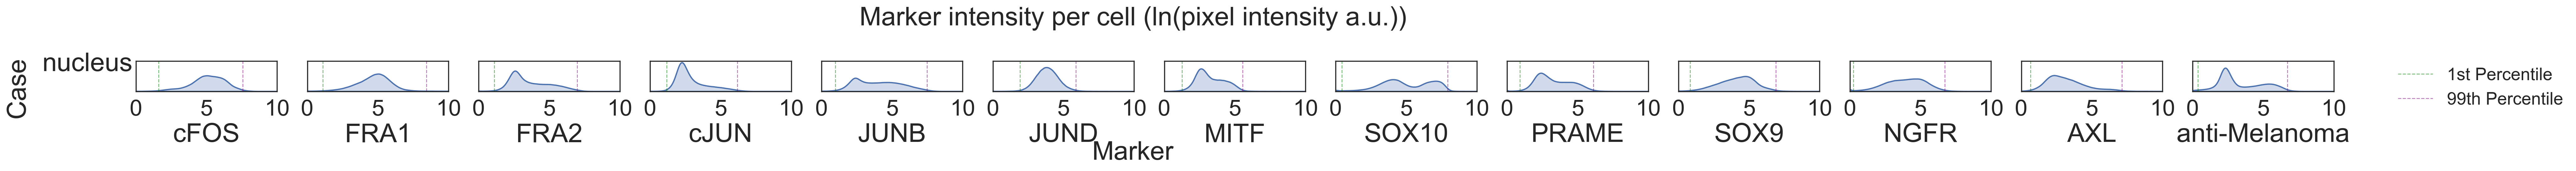

In [ ]:
hm.distPlot3(adata_dict['nucleus'], layer='log1p_raw', multiple_cases= False, plot_title='Marker intensity per cell (ln(pixel intensity a.u.))',
              imageid='segmentation_mask',markers=AP1s + Diff_state_markers, column
              figsize=(20,20), fontsize=30,scale_x1=0, scale_x2=10, vline=0,)

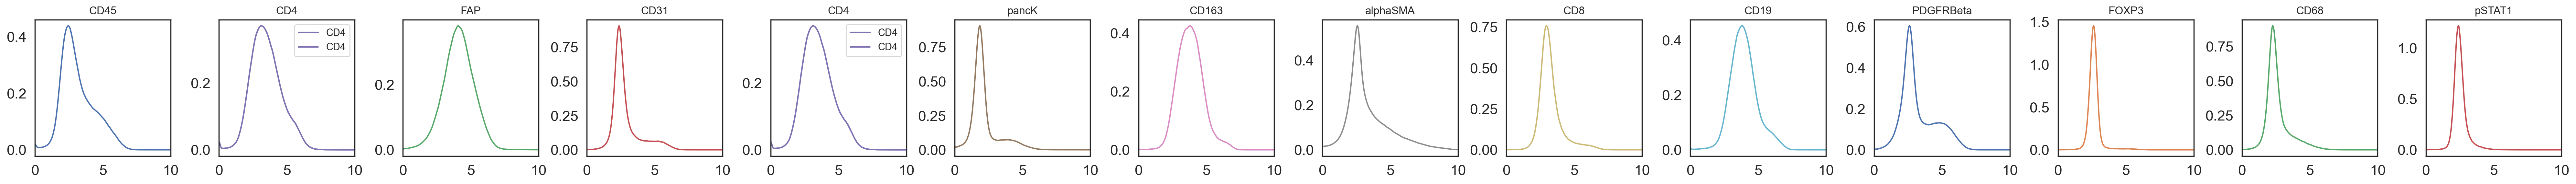

In [51]:
# To make the plot taller for adata_dict['nucleus'], increase the height value in figsize:
hm.distPlot3(
    adata_dict['nucleus'],
    layer='log1p_raw',
    multiple_cases=False,
    ncols=14,
    plot_title='Marker intensity per cell (ln(pixel intensity a.u.))',
    imageid='segmentation_mask',
    markers=TME_markers,
    figsize=(40, 3),  # Increase height from 20 to 40
    fontsize=16,
    scale_x1=0,
    scale_x2=10,
    vline=0,)

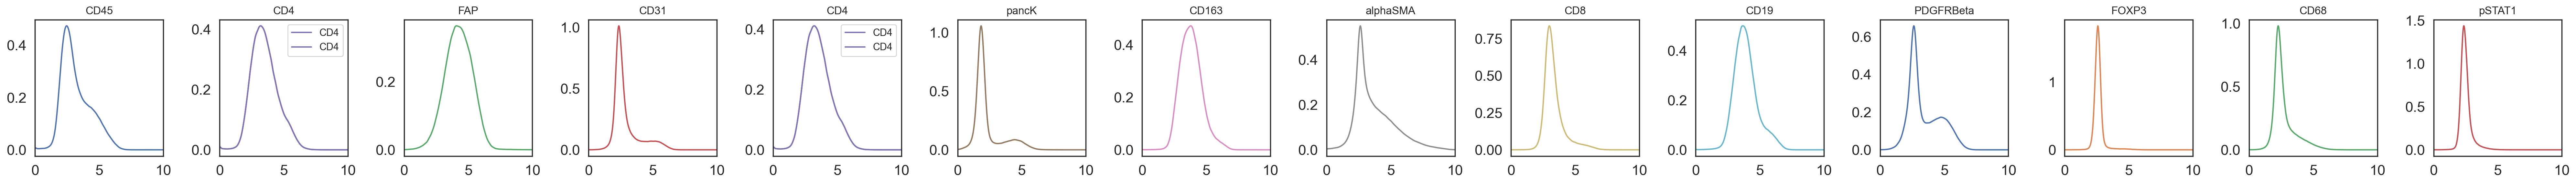

In [50]:
hm.distPlot3(
    adata_dict['nuc_cyto'],
    layer='log1p_raw',
    multiple_cases=False,
    ncols=14,
    plot_title='Marker intensity per cell (ln(pixel intensity a.u.))',
    imageid='segmentation_mask',
    markers=TME_markers,
    figsize=(40, 3),  # Increase height from 20 to 40
    fontsize=16,
    scale_x1=0,
    scale_x2=10,
    vline=0,)

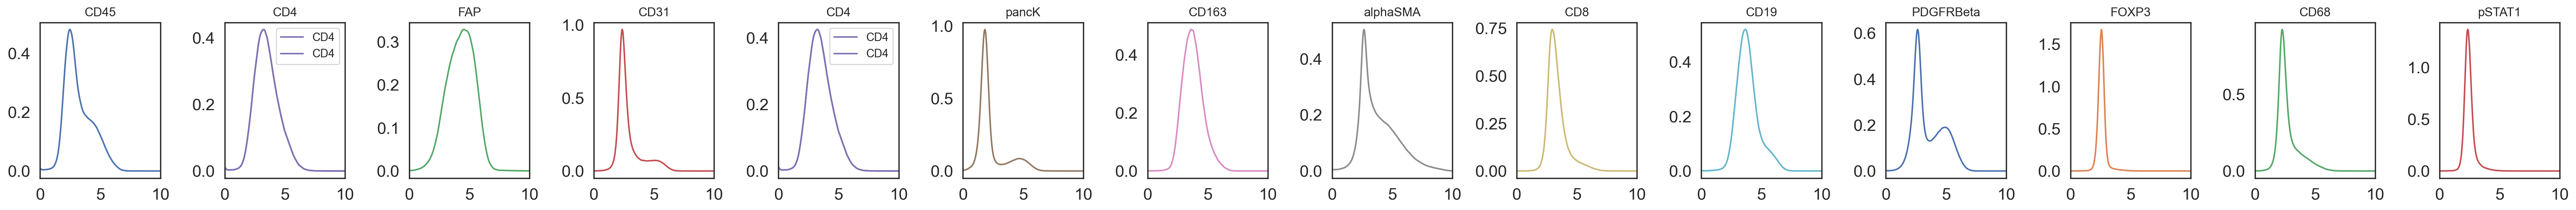

In [ ]:
hm.distPlot3(
    adata_dict['cytorings'], 
    layer='log1p_raw',
    multiple_cases=False,
    ncols=14,
    plot_title='Marker intensity per cell (ln(pixel intensity a.u.))',
    imageid='segmentation_mask',
    markers=TME_markers,
    figsize=(35, 3),  # Increase height from 20 to 40
    fontsize=16,
    scale_x1=0,
    scale_x2=10,
    vline=0,)

Raw pixel distribution

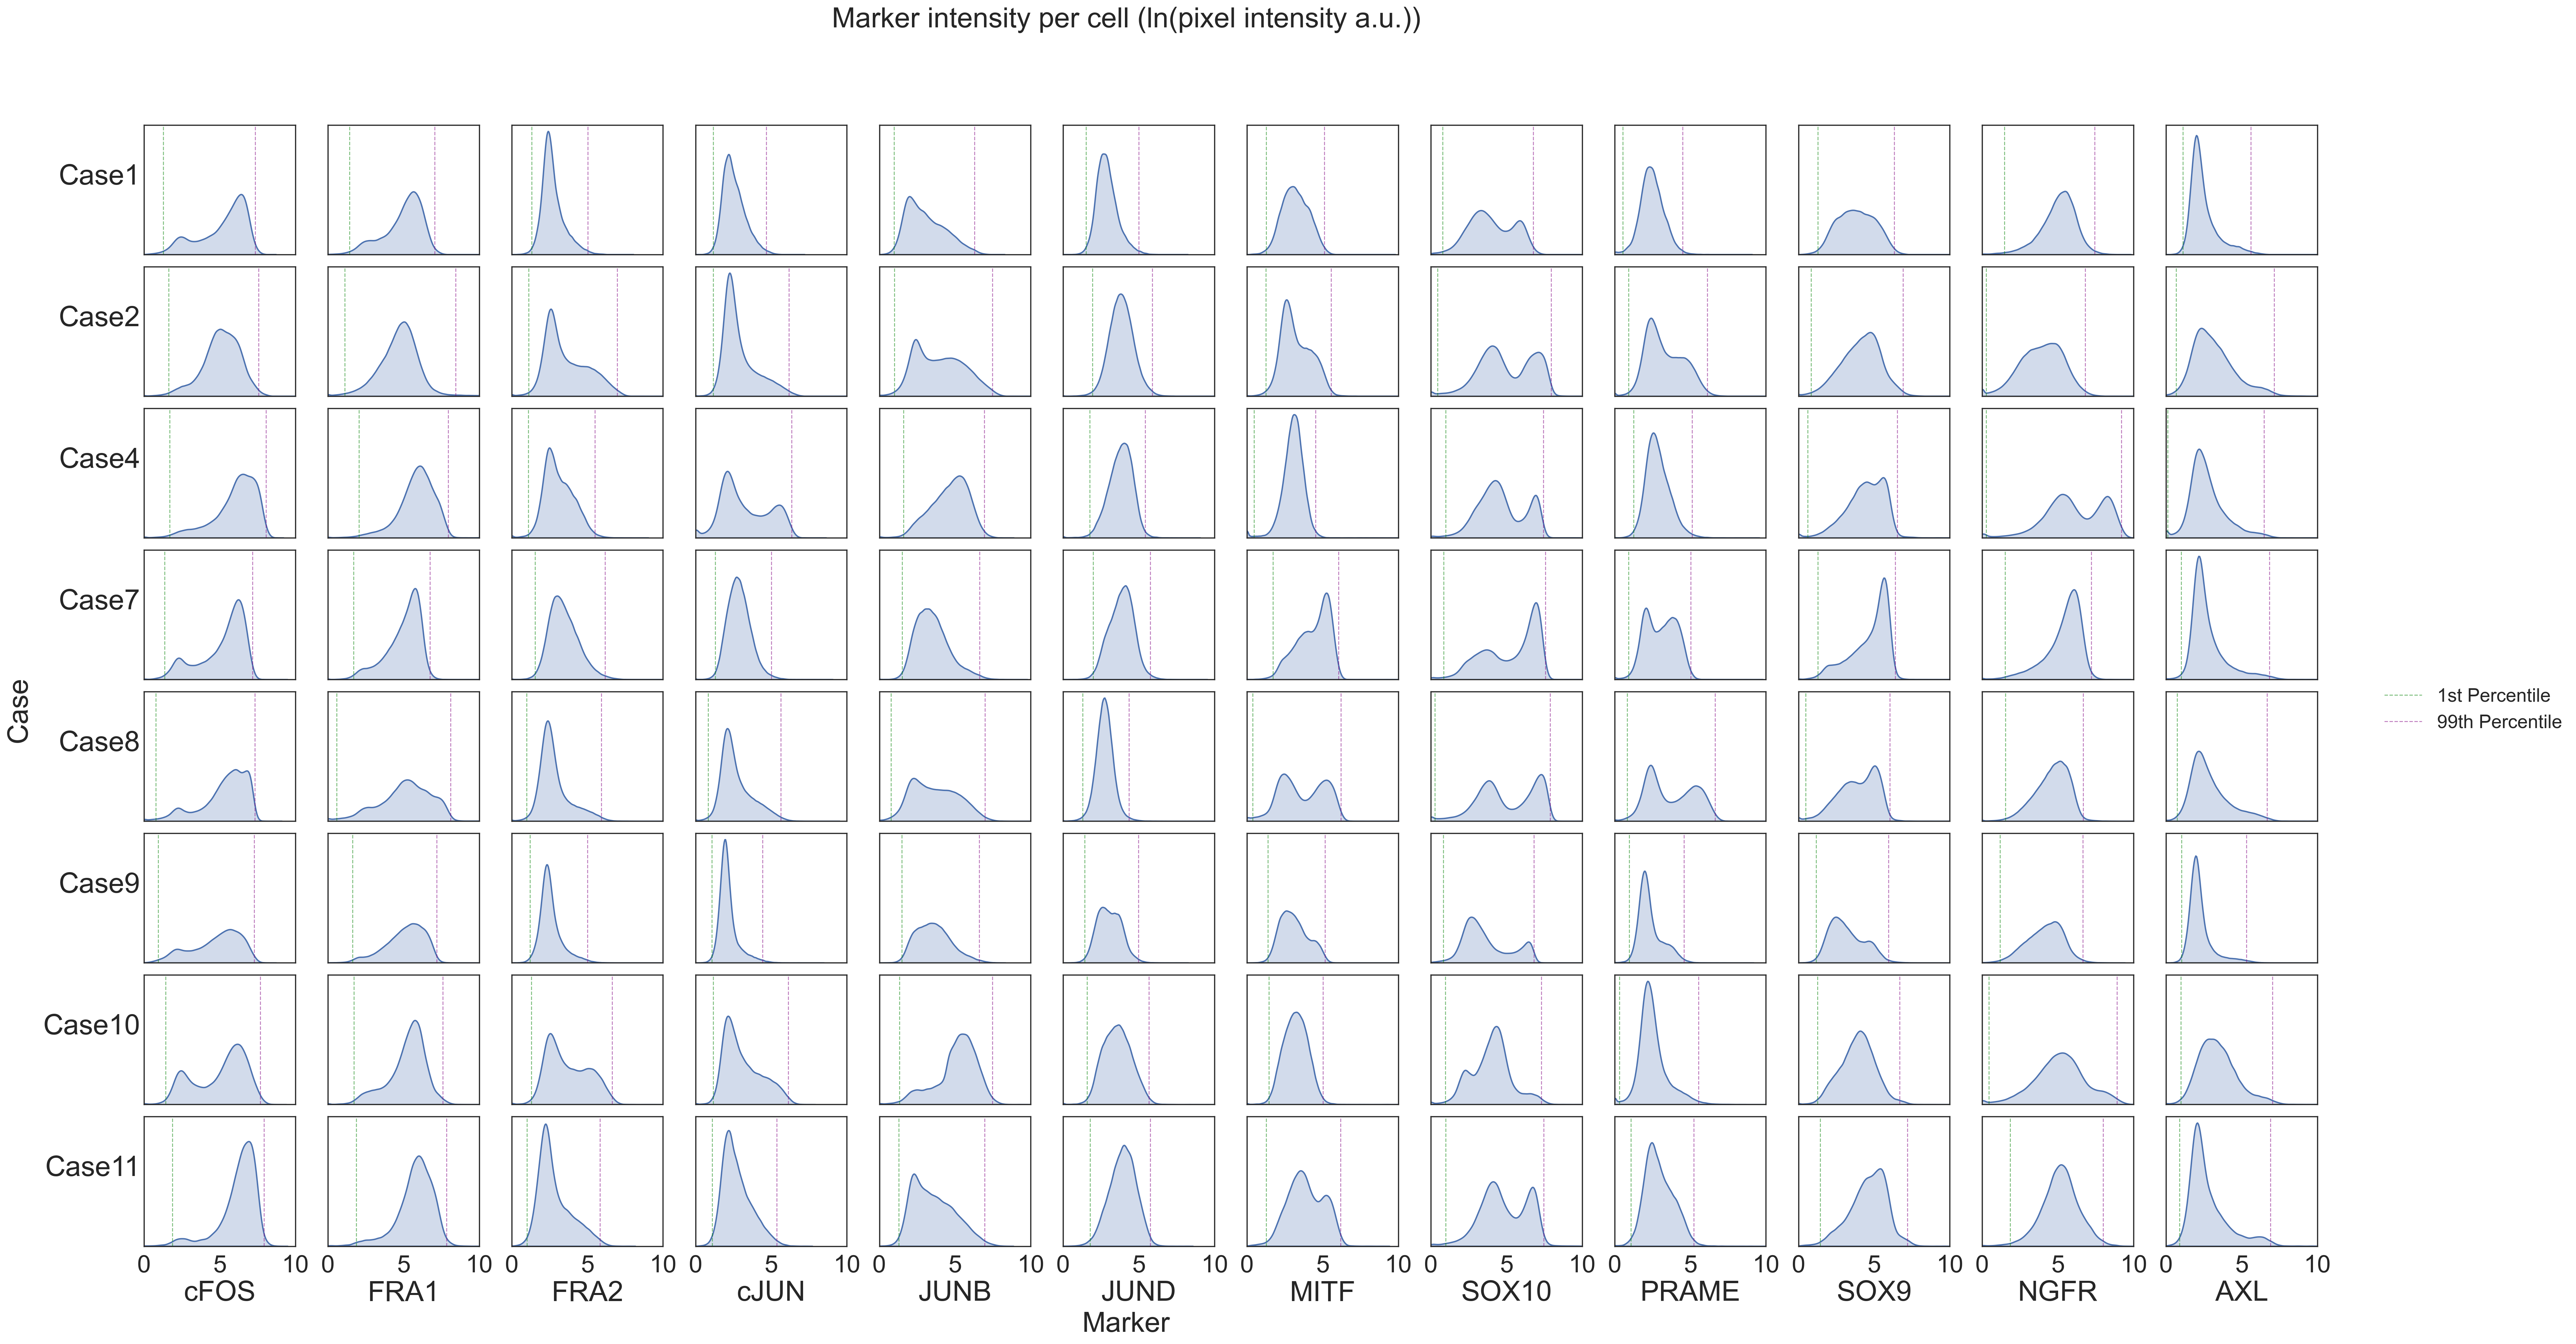

In [392]:
hm.distPlot3(combined_adata, layer='log1p_raw', multiple_cases= True, plot_title='Marker intensity per cell (ln(pixel intensity a.u.))',
             markers=AP1s + Diff_state_markers, imageid='TissueID',
              figsize=(16,20),ncols=13, fontsize=30,scale_x1=0, scale_x2=10, vline=0,)

Normalized pixel distribution

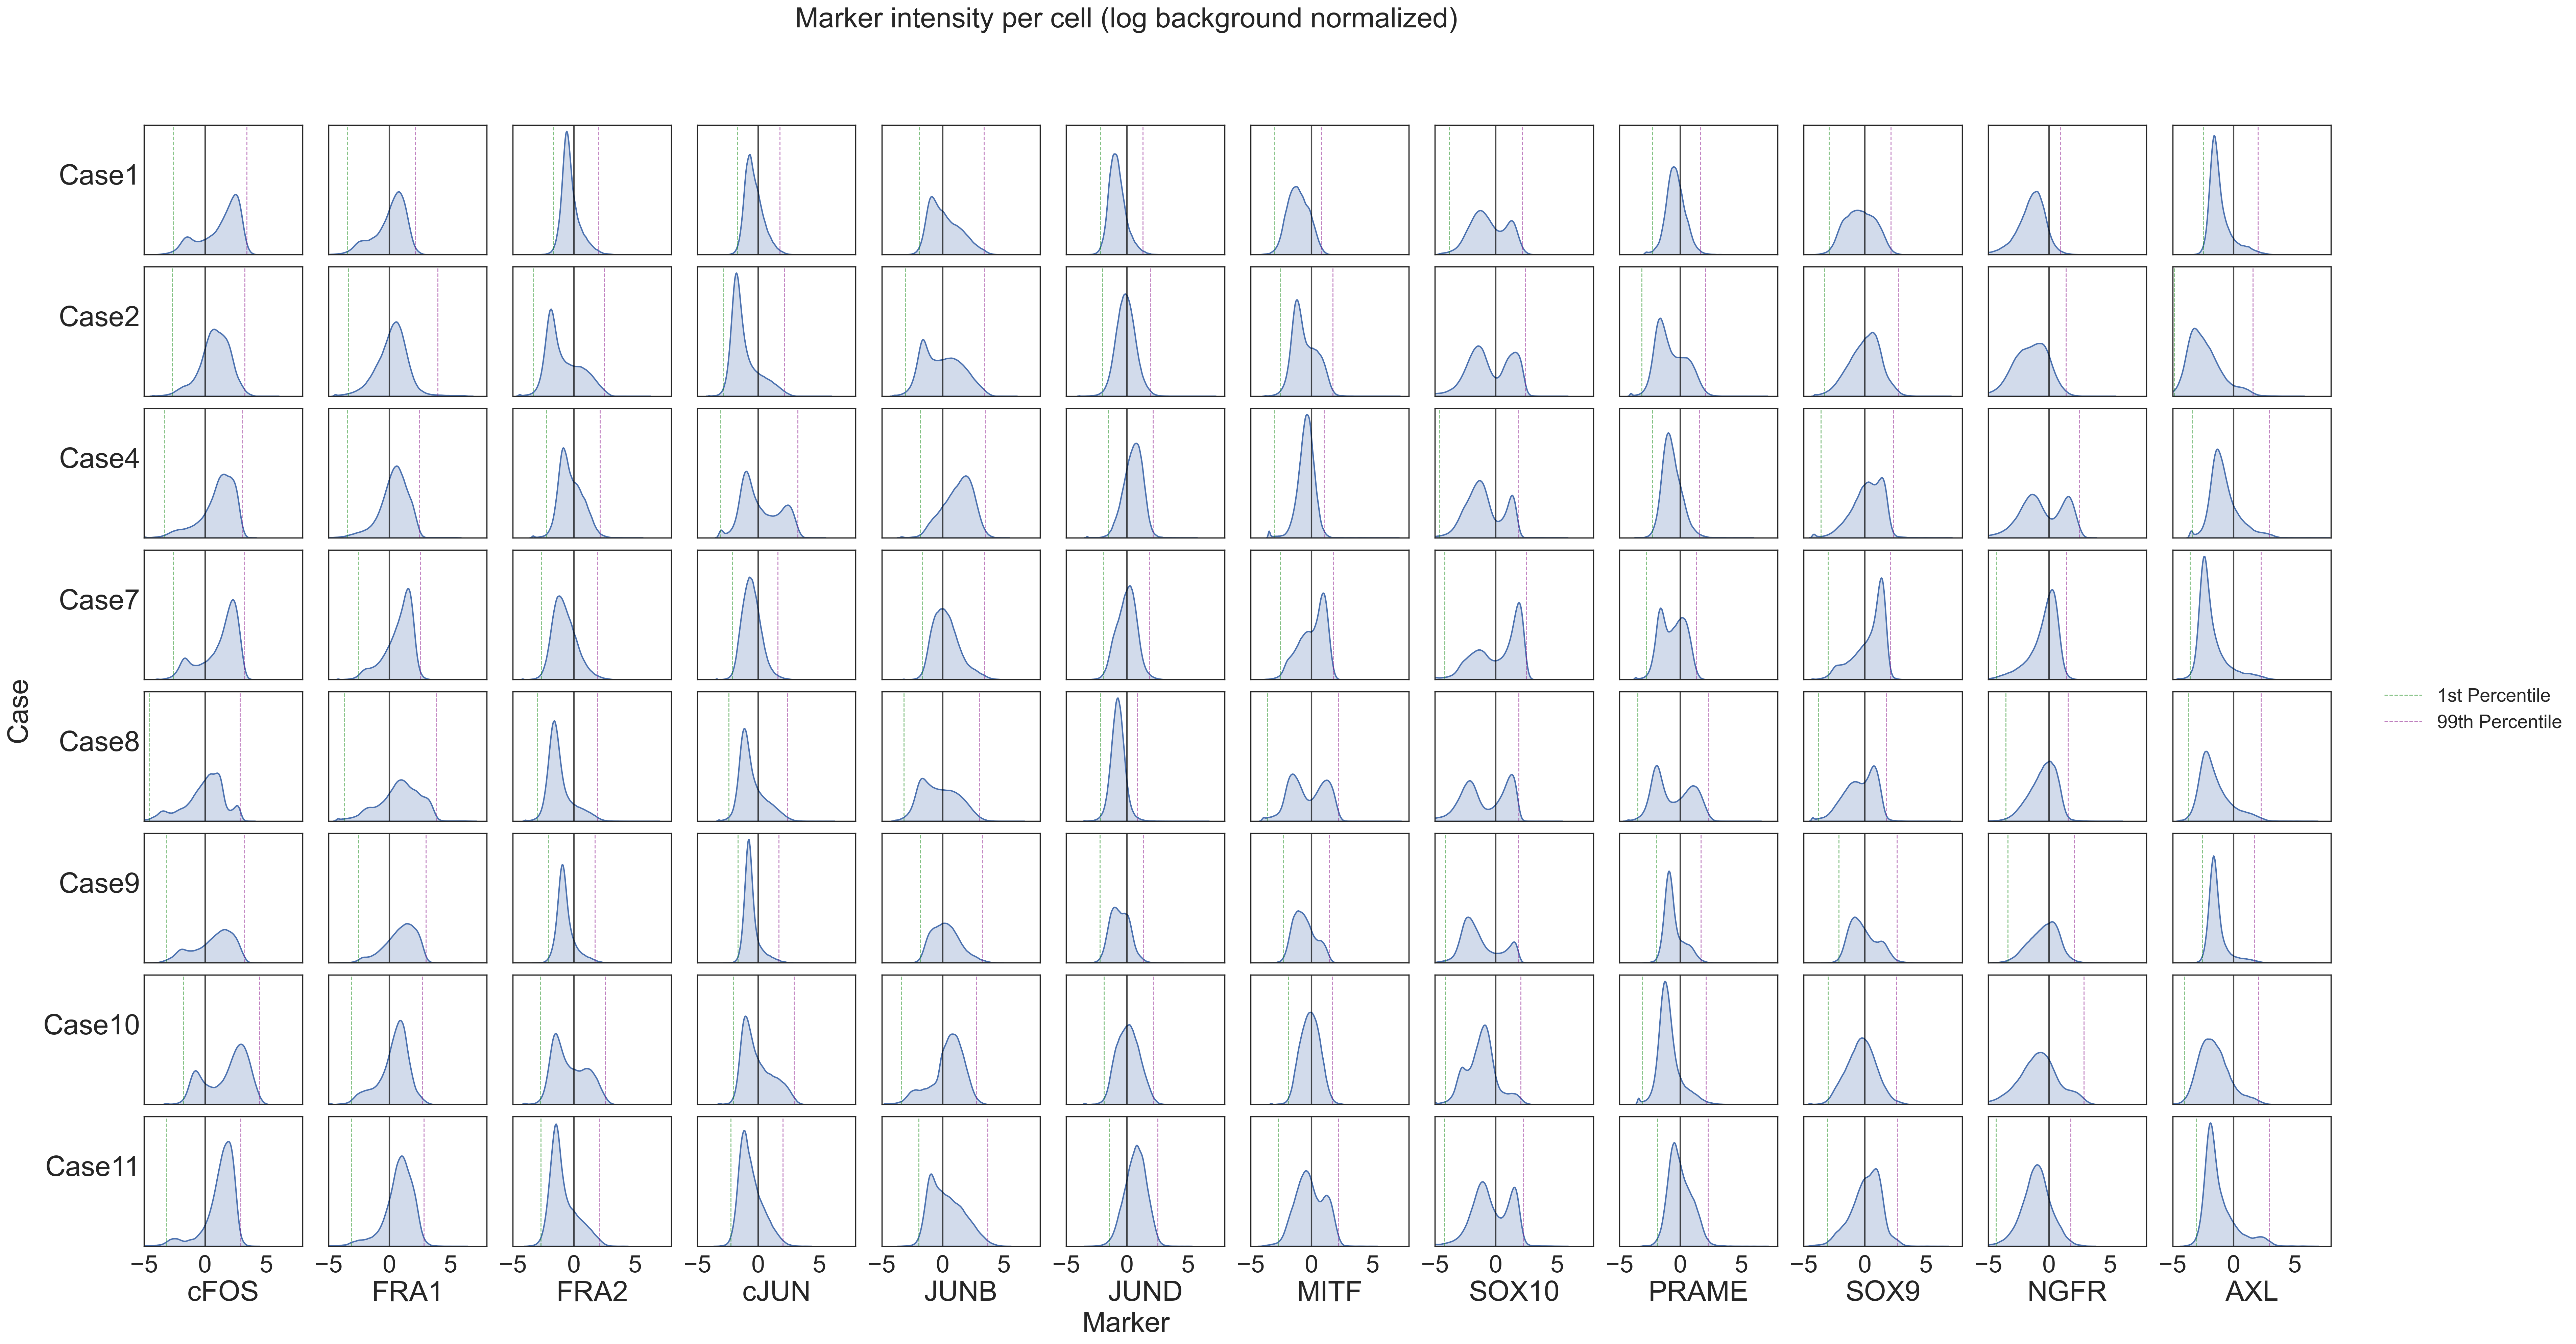

In [393]:
hm.distPlot3(combined_adata, layer='log_background_normalized', multiple_cases= True,plot_title='Marker intensity per cell (log background normalized)',
             markers=AP1s + Diff_state_markers, imageid='TissueID',
              figsize=(16,20),ncols=13, fontsize=30,scale_x1=-5, scale_x2=8, vline=0,)

In [233]:
combined_adata

AnnData object with n_obs × n_vars = 2017267 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'phenotype', 'phenotype_category', 'case_number'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed'

Save combined_adata

In [234]:
combined_adata.write_h5ad(os.path.join(project_dir, 'combined_adata_v1.h5ad'))

In [165]:
adata = ad.read_h5ad(os.path.join(project_dir, 'combined_tumor_adata_v1.h5ad'))

In [166]:
adata_subset = hm.threshold_phenotype_by_prevalence(adata, threshold=0.001, verbose=True, return_adata=True)

                                       count
phenotype                                   
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-  250515
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-  158582
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-   66519
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-   37728
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-   37343
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-   36755
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-   24583
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-   21500
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-   21145
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-   20514
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-   19748
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   17993
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-   13065
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-   12814
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-    8643
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-    6937
MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-    6274
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-    4961
MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-    4606
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+    4257
MITF+ SOX1

In [196]:
adata_subset.layers['log_background_normalized']

array([[-1.10480166, -0.66824199, -0.47233243, ...,  2.04520394,
        -0.78665691, -0.93976678],
       [-1.53349221, -1.44033128, -1.00112513, ...,  0.78161188,
        -0.72164391, -1.13841811],
       [-1.40767139, -1.12329887, -1.2111364 , ...,  2.67340387,
        -0.36421223, -1.18017425],
       ...,
       [-2.77452178, -2.2513958 , -1.97836158, ..., -2.4757384 ,
        -1.09451173, -3.43174257],
       [-0.4524426 ,  0.05166537, -0.41640749, ...,  3.14234943,
         1.16957663,  2.26975294],
       [-0.21830299, -0.95661177, -0.97678066, ...,  2.46440299,
         2.78616581, -1.76439699]])

In [197]:


# Copy the original layer
adata_subset.layers['log_background_normalized_zeroed'] = adata_subset.layers['log_background_normalized'].copy()

# Zero out negative values
adata_subset.layers['log_background_normalized_zeroed'][adata_subset.layers['log_background_normalized_zeroed'] < 0] = 0


In [200]:
adata_subset.layers['log_background_normalized_zeroed']

array([[0.        , 0.        , 0.        , ..., 2.04520394, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.78161188, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.67340387, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05166537, 0.        , ..., 3.14234943, 1.16957663,
        2.26975294],
       [0.        , 0.        , 0.        , ..., 2.46440299, 2.78616581,
        0.        ]])

In [201]:

def heatmapnew2(
    adata,
    groupBy,
    layer=None,
    subsetMarkers=None,
    subsetGroups=None,
    clusterRows=True,
    clusterColumns=True,
    standardScale=None,
    orderRow=None,
    orderColumn=None,
    showPrevalence=False,
    cmap='vlag',
    figsize=None,
    saveDir=None,
    fileName=None,
    verbose=True,
    scale_title=None,
    dend_threshold=None,
    dend_axis = False,
    y_lab='Categories',
    row_dendrogram=None,
    phenotype_matrix=None,
    phenotype_labels=None,
    clustering_method='average',
    return_row_linkage=False,
    x_tick_rotation=90,
    **kwargs,
):

    # load adata
    if isinstance(adata, str):
        adata = ad.read_h5ad(adata)

    # check if the location is provided if the user wishes to save the image
    if (saveDir is None and fileName is not None) or (
        saveDir is not None and fileName is None
    ):
        raise ValueError(
            "Both 'saveDir' and 'fileName' must be provided together or not at all."
        )

    # subset data if user requests
    subsetadata = None  # intialize subsetted data
    if subsetGroups:
        subsetGroups = (
            [subsetGroups] if isinstance(subsetGroups, str) else subsetGroups
        )  # convert to list
        subsetadata = adata[adata.obs[groupBy].isin(subsetGroups)]
        # also identify the categories to be plotted
        categories = subsetadata.obs[groupBy].values
    else:
        # also identify the categories to be plotted
        categories = adata.obs[groupBy].values

    # subset the markers if user requests
    if subsetMarkers:
        subsetMarkers = (
            [subsetMarkers] if isinstance(subsetMarkers, str) else subsetMarkers
        )  # convert to list
        if subsetadata:
            # isolate the data
            if layer == 'raw':
                data = subsetadata[:, subsetMarkers].raw.X
            elif layer is None:
                data = subsetadata[:, subsetMarkers].X
            else:
                data = subsetadata[:, subsetMarkers].layers[layer]
        else:
            # isolate the data
            if layer == 'raw':
                data = adata[:, subsetMarkers].raw.X
            elif layer is None:
                data = adata[:, subsetMarkers].X
            else:
                data = adata[:, subsetMarkers].layers[layer]
    else:
        # take the whole data if the user does not subset anything
        if layer == 'raw':
            data = adata.raw.X
        elif layer is None:
            data = adata.X
        else:
            data = adata.layers[layer]

    # intialize the markers to be plotted
    if subsetMarkers is None:
        subsetMarkers = adata.var.index.tolist()

    # The actual plotting function
    def plot_category_heatmap_vectorized(
        data,
        marker_names,
        categories,
        clusterRows,
        clusterColumns,
        standardScale,
        orderRow,
        orderColumn,
        showPrevalence,
        cmap,
        figsize,
        dend_threshold,
        clustering_method,
        row_dendrogram,
        x_tick_rotation,
        phenotype_matrix,
        dend_axis,
        y_lab,
        phenotype_labels,
        saveDir,
        fileName,
        **kwargs,
    ):
        # Validate clustering and ordering options
        if (clusterRows) and (orderRow is not None):
            raise ValueError(
                "Cannot use clustering and manual ordering together. Please choose one or the other."
            )
        
        if (clusterColumns) and (orderColumn is not None):
            raise ValueError(
                "Cannot use clustering and manual ordering together. Please choose one or the other."
            )

        if standardScale not in [None, 'row', 'column']:
            raise ValueError("standardScale must be 'row', 'column', or None.")

        # Convert marker_names to list if it's a pandas Index
        # if isinstance(marker_names, pd.Index):
        #    marker_names = marker_names.tolist()

        # Data preprocessing
        sorted_indices = np.argsort(categories)
        data = data[sorted_indices, :]
        categories = categories[sorted_indices]
        unique_categories, category_counts = np.unique(categories, return_counts=True)

        # Compute mean values for each category
        mean_data = np.array(
            [
                np.mean(data[categories == category, :], axis=0)
                for category in unique_categories
            ]
        )

        # Apply standard scaling if specified
        if standardScale == 'row':
            scaler = StandardScaler()
            mean_data = scaler.fit_transform(mean_data)
        elif standardScale == 'column':
            scaler = StandardScaler()
            mean_data = scaler.fit_transform(mean_data.T).T
            
    
       
        # Apply manual ordering if specified
        if orderRow:
            # Ensure orderRow is a list
            if isinstance(orderRow, pd.Index):
                orderRow = orderRow.tolist()
            row_order = [unique_categories.tolist().index(r) for r in orderRow]
            mean_data = mean_data[row_order, :]
            unique_categories_ordered = [unique_categories[i] for i in row_order]
            category_counts = [category_counts[i] for i in row_order]

        if orderColumn:
            # Ensure orderColumn is a list0000
            if isinstance(orderColumn, pd.Index):
                orderColumn = orderColumn.tolist()
            col_order = [marker_names.index(c) for c in orderColumn]
            mean_data = mean_data[:, col_order]
            marker_names = [marker_names[i] for i in col_order]

            # Clustering
        row_linkage = None    
        if clusterRows:
            # Perform hierarchical clustering
            row_linkage = linkage(pdist(mean_data), method=clustering_method)
            
        #Row dendogram
        
        if clusterColumns:
            # Perform hierarchical clustering
            col_linkage = linkage(pdist(mean_data.T), method = clustering_method)
            
            
        # Plotting
        # Dynamic figsize calculation
        if figsize is None:
            base_size = 0.5  # Base size for each cell in inches
            figsize_width = max(10, len(marker_names) * base_size)
            figsize_height = max(8, len(unique_categories) * base_size)
            figsize = (figsize_width, figsize_height)
        
        # Create a grid layout for the heatmap and dendrograms
        fig = plt.figure(figsize=figsize)
        spec = plt.GridSpec(nrows=2, ncols=3, 
                            width_ratios=[1,1,3],
                            height_ratios=[1, 5],
                            wspace=0.05,
                            figure=fig)



       
         
        

        # Column dendrogram
        '''
        if clusterColumns:
            ax_col_dendro = fig.add_subplot(spec[0, 2])
            col_dendro = dendrogram(col_linkage, ax=ax_col_dendro)
            col_order = col_dendro['leaves']
            mean_data = mean_data[:, col_order]
            marker_names = [marker_names[i] for i in col_order]
            ax_col_dendro.axis('off')
'''
        if clusterColumns:
            # Reorder data according to the clustering
            col_order = dendrogram(col_linkage, no_plot=True)['leaves']
            mean_data = mean_data[:, col_order]
            marker_names = [marker_names[i] for i in col_order]

        
        
        
        
        
        #Row dendogram
        if clusterRows:
            if row_dendrogram:
                ax_row_dendro = fig.add_subplot(spec[1, 0])
                row_dendro = dendrogram(row_linkage, orientation='left', ax=ax_row_dendro, color_threshold=dend_threshold)
                row_order = row_dendro['leaves']
                
                mean_data = mean_data[row_order, :]
                unique_categories_ordered = unique_categories[row_order]
                category_counts = category_counts[row_order]
                if dend_axis:
                    ax_row_dendro.axis('on')
                    max_distance = np.max(row_linkage[:, 2])  # Get the maximum distance from the linkage matrix
                    num_ticks = 5  # Number of ticks you want
                    tick_positions = np.linspace(0, max_distance, num_ticks)  # Generate tick positions
                    ax_row_dendro.set_xticks(tick_positions)  # Set x-tick positions
                    ax_row_dendro.set_xticklabels([int(tick) for tick in tick_positions], fontsize=8)  # Set integer x-tick labels
                else:
                    ax_row_dendro.axis('off')
            else:
                row_order = dendrogram(row_linkage, no_plot=True)['leaves']
                mean_data = mean_data[row_order, :]
                unique_categories_ordered = unique_categories[row_order]
                category_counts = category_counts[row_order]
       
        #Phenotype matrix
        if phenotype_matrix:
            ax_colored_grid = fig.add_subplot(spec[1, 1])
            plot_colored_grid(
                categories=unique_categories_ordered,
                ax= ax_colored_grid,
                grid=True,
                columnlabels=phenotype_labels,
                frame=True,
                verbose=verbose,
                )
            ax_colored_grid.axis('on')
        
        
        # Heatmap
        ax = fig.add_subplot(spec[1,2])
        vmin = kwargs.pop('vmin', np.min(mean_data))
        vmax = kwargs.pop('vmax', np.max(mean_data))
        #norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
        norm = colors.TwoSlopeNorm(vmin=vmin, vmax=vmax)
        c = ax.imshow(mean_data, aspect='auto', cmap=cmap, norm=norm, **kwargs)
        
        # Prevalence text
        if showPrevalence:
            # Calculate text offset from the last column of the heatmap
            text_offset = (
                mean_data.shape[1] * 0.001
            )  # Small offset from the right edge of the heatmap
            total_cells = sum(category_counts)

            for index, count in enumerate(category_counts):
                percentage = (count / total_cells) * 100
                # Position text immediately to the right of the heatmap
                ax.text(
                    mean_data.shape[1] + text_offset,
                    index,
                    f"n={count} ({percentage:.1f}%)",
                    va='center',
                    ha='left',
                )
        
        # Setting the tick labels
        ax.set_xticks(np.arange(mean_data.shape[1]))
        ax.tick_params(axis='x', pad=0)
        if x_tick_rotation > 0:
            ax.set_xticklabels(marker_names, rotation=x_tick_rotation, ha="right",va='top',)
            
        elif x_tick_rotation == 90:
            ax.set_xticklabels(marker_names, rotation=x_tick_rotation, ha="center",va='top',)
        else:
             ax.set_xticklabels(marker_names, rotation=x_tick_rotation, ha="center",va='center',)
        ax.set_yticks(np.arange(mean_data.shape[0]))
        if phenotype_matrix:
            ax.set_yticks([])
        else:
            ax.set_yticklabels(unique_categories_ordered)
        
        #ax.set_yticklabels(unique_categories)
        
        # Move the colorbar to the top left corner
        # cbar_ax = fig.add_axes([0.125, 0.92, 0.2, 0.02])  # x, y, width, height
        cbar_ax = ax.inset_axes([1.5, -1.5, 4, 0.5], transform=ax.transData)
        cbar = plt.colorbar(c, cax=cbar_ax, orientation='horizontal')
        cbar_ax.xaxis.set_ticks_position('top')
        cbar_ax.xaxis.set_label_position('top')
        if scale_title:
            cbar.set_label(scale_title)
        else:
            cbar.set_label('Mean expression in group')

        ax.set_xlabel('Markers',labelpad=15)
        if phenotype_matrix is None:
            ax.set_ylabel(y_lab)
        
        plt.tight_layout()

        # Saving the figure if saveDir and fileName are provided
        if saveDir:
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)
            full_path = os.path.join(saveDir, fileName)
            plt.savefig(full_path, bbox_inches='tight', pad_inches=0.1,dpi=300)
            plt.close(fig)
            print(f"Saved heatmap to {full_path}")
        
        else:
            plt.show()

        if return_row_linkage:
            cluster_labels = fcluster(row_linkage, t=dend_threshold, criterion='distance')
            
            reversed_categories = unique_categories_ordered[::-1]
            
            ordered_df = pd.DataFrame({
                'key': row_order,
                'phenotype': [reversed_categories[i] for i, index in enumerate(row_order)]
            })
            cluster_labels_final =[]
            for i in ordered_df['key']:    
                cluster_labels_final.append(cluster_labels[i])
                #ordered_df.at[i, 'cluster'] = cluster_labels[i]
            
            ordered_df['cluster'] = cluster_labels_final
            ordered_df['cluster'] = ordered_df['cluster'].astype('category')
            phenotype_cluster_mapping= dict(zip(ordered_df['phenotype'], ordered_df['cluster']))
            #phenotype_cluster_mapping = ordered_df
            
            return phenotype_cluster_mapping
        
            
        
    # call the plotting function
    phenotype_cluster_mapping = plot_category_heatmap_vectorized(
        data=data,
        marker_names=subsetMarkers,
        categories=categories,
        clusterRows=clusterRows,
        clusterColumns=clusterColumns,
        standardScale=standardScale,
        orderRow=orderRow,
        orderColumn=orderColumn,
        showPrevalence=showPrevalence,
        cmap=cmap,
        dend_threshold=dend_threshold,
        clustering_method=clustering_method,
        phenotype_labels=phenotype_labels,
        dend_axis=dend_axis,
        y_lab=y_lab,
        row_dendrogram=row_dendrogram,
        phenotype_matrix=phenotype_matrix,
        x_tick_rotation=x_tick_rotation,
        figsize=figsize,
        saveDir=saveDir,
        fileName=fileName,
        **kwargs,
    )
    
    if return_row_linkage:
        return phenotype_cluster_mapping
    

[[1 0 0 4 5 6]
 [1 0 0 4 0 6]
 [1 2 0 0 0 6]
 [1 0 0 0 0 6]
 [1 2 0 0 5 6]
 [1 0 0 0 5 6]
 [0 2 3 4 5 0]
 [0 2 0 4 5 0]
 [1 2 0 4 5 6]
 [0 2 0 4 5 6]
 [0 2 3 4 0 0]
 [1 0 0 4 0 0]
 [1 2 0 4 0 0]
 [0 2 0 4 0 0]
 [1 2 3 0 5 6]
 [1 2 3 4 5 6]
 [1 2 3 4 5 0]
 [1 2 3 0 5 0]
 [0 2 3 0 5 0]
 [0 2 0 0 5 0]
 [1 2 0 4 5 0]
 [1 2 0 0 5 0]
 [0 2 3 0 0 0]
 [0 2 0 0 0 0]
 [1 2 3 0 0 0]
 [1 2 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 4 5 0]
 [1 0 0 0 5 0]
 [1 0 3 4 5 0]
 [1 0 3 0 5 0]
 [1 0 3 0 0 0]
 [1 2 3 4 0 0]
 [1 0 3 4 0 0]]
['MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+'
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+'
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+'
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL+'
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+'
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-'
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-'
 'MITF+ S

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1619: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



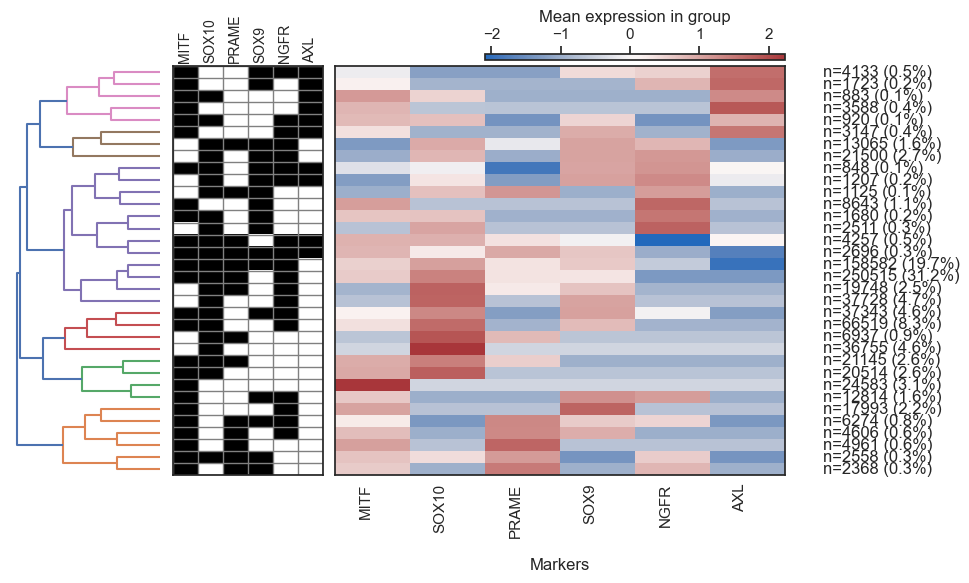

In [211]:
phenotype_cross_cluster = hm.heatmapnew(
    adata_subset,
    groupBy='phenotype',
    layer='log_background_normalized_zeroed',
    subsetMarkers=Diff_state_markers,
    
    clusterRows=True,
    clusterColumns=False,
    standardScale='column',
    showPrevalence=True,
    cmap='vlag',
    figsize=(10,7),
    scale_title=None,
    dend_threshold=3.5,
    dend_axis = False,
    y_lab='Categories',
    row_dendrogram=True,
    phenotype_matrix=True,
    phenotype_labels=Diff_state_markers,
    clustering_method='complete',
    verbose=True,
    return_row_linkage=True,
   
)

In [181]:
def translate_matrix_to_phenotypes(matrix, markers, count=False):
    

    # Function to convert a row to phenotype string
    def row_to_phenotype(row, markers):
        phenotype = []
        for val, marker in zip(row, markers):
            if val == 0:
                phenotype.append(f"{marker}-")
            else:
                phenotype.append(f"{marker}+")
        return " ".join(phenotype)

    # Convert all rows in matrix to phenotype strings
    phenotype_array = [row_to_phenotype(row, markers) for row in matrix]

 
    if count == True:
        # Print counts for each repeating phenotype
        from collections import Counter
        counts = Counter(phenotype_array)
        print("\nPhenotype counts:")
        for pheno, count in counts.most_common():
            print(f"{pheno}: {count}")
    else:
           # Display the phenotype array
        return phenotype_array

In [ ]:
phenotype_counts =[]
for pheno in adata_subset.obs['phenotype'].unique():
    count = (adata_subset.obs['phenotype'] == pheno).sum()
    phenotype_counts.append({'phenotype': pheno, 'cell_count': count, 'percent_of_total_cells': (count/adata_subset.shape[0]) * 100},)
    
phenotype_count_df = pd.DataFrame(phenotype_counts)


In [186]:
phenotype_count_df

phenotype  cell_count  percent_of_total_cells
0   MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-       19748                2.456619
1   MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-       37728                4.693302
2   MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-       66519                8.274856
3   MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-       17993                2.238300
4   MITF- SOX10+ PRAME- NGFR- SOX9- AXL-       36755                4.572262
5   MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-       21500                2.674565
6   MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+         920                0.114447
7   MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-      250515               31.163660
8   MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-       37343                4.645409
9   MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-        2511                0.312364
10  MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-       13065                1.625265
11  MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-      158582               19.727344
12  MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-       21145                2.630404
13  MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-       20514                2.551908
14  MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-        6937                0.862952
15  MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+        4257                0.529564
16  MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-        1125                0.139948
17  MITF+ SOX10- PRAME- NGFR- SOX9- AXL-       24583                3.058085
18  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+        1207                0.150149
19  MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+        4133                0.514138
20  MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-        4606                0.572979
21  MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-        4961                0.617140
22  MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+        2696                0.335378
23  MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+         848                0.105490
24  MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-       12814                1.594041
25  MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-        1680                0.208989
26  MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-        6274                0.780475
27  MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+         883                0.109844
28  MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-        2368                0.294575
29  MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-        2558                0.318211
30  MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-        8643                1.075175
31  MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+        3147                0.391482
32  MITF+ SOX10- PRAME- NGFR- SOX9- AXL+        3588                0.446341
33  MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+        1723                0.214338

In [ ]:
unique_matrix =

In [187]:
row_linkage = linkage(adata_subset, method='complete', metric='euclidean')
row_order = leaves_list(row_linkage)

KeyboardInterrupt: 

In [192]:
phenotype_cross_cluster 

{'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-': 1,
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-': 2,
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-': 3,
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-': 3,
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-': 4,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-': 4,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-': 5,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-': 5,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-': 5,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-': 5,
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-': 5,
 'MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-': 5,
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-': 5,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-': 5,
 'MITF- SOX10+ PRAME- NGFR+ SOX9

In [191]:
row_order = leaves_list(phenotype_cross_cluster)

TypeError: Linkage matrix 'Z' must contain doubles.

In [194]:
adata_subset.obs["phenotype_cross_cluster"] = adata_subset.obs["phenotype"].map(phenotype_cross_cluster)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_27495/2162118479.py:1: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [195]:
adata_subset.obs['phenotype_cross_cluster'].value_counts()

phenotype_cross_cluster
4    483195
3    104247
1     90718
5     47583
2     41659
6     28808
7      7659
Name: count, dtype: int64

In [270]:
adata_list[10].uns['gates']

Case11-13
markers           
AXL       3.960000
CD4       3.530000
CD45      3.270000
FRA1      5.000000
FRA2      3.710000
Hoechst   7.649927
JUNB      3.250000
JUND      3.230000
Ki67      3.130000
MITF      4.000000
NGFR      6.200000
PRAME     2.960000
SOX10     5.220000
SOX9      4.500000
cFOS      5.000000
cJUN      3.340000
pancK     4.618820

In [263]:
adata_list[7].uns['gates']=pd.read_csv(os.path.join( project_dir, 'Case9-7_R2', 'Case9-7_R2_gates.csv'),
        header = [0], index_col =[0])

In [269]:
adata_list[10].obs['imageid'].unique()

['Case11-13']
Categories (1, object): ['Case11-13']